# Cryptocurrency Clusters

In [1]:
import pandas as pd
df = pd.read_csv('./Resources/crypto_data.csv')
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [ ]:
hotel_df = weather_df[(weather_df['Max_Temp']<80) &
                      (weather_df['Max_Temp']>70) &
                      (weather_df['Wind_Speed']<10) &
                      (weather_df['Cloudiness']==0)]

In [6]:
df_trading = df[(df['IsTrading']==True)]
df_trading

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [7]:
df_trading1 = df_trading.drop('IsTrading',axis=1)
df_trading1

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
df_trading1 = df_trading.drop('IsTrading',1)
df_trading1

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
df_trading1 = df_trading.drop(df_trading.columns[3],1)
df_trading1

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [12]:
df_trading1.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [13]:
df_trading2 = df_trading1.dropna()
df_trading2

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [14]:
df_trading3 = df_trading2[(df_trading2['TotalCoinsMined']>0)]
df_trading3

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [17]:
df_trading4 = df_trading3.drop(['CoinName','Unnamed: 0'],1)
df_trading4

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [18]:
cols = [0, 1]
df_trading4 = df_trading3.drop(df_trading3.columns[cols],axis=1)
df_trading4

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [21]:
df_trading4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


In [23]:
df_trading4['TotalCoinSupply'] = df_trading4['TotalCoinSupply'].astype(str).astype(float)
df_trading4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(2)
memory usage: 20.8+ KB


In [20]:
df_trading4['Algorithm'].unique()

array(['Scrypt', 'X13', 'SHA-256', 'Ethash', 'X11', 'CryptoNight-V7',
       'Equihash', 'SHA-512', 'Multiple', 'X15', 'Quark', 'Groestl',
       'PoS', 'NeoScrypt', 'SHA3', 'HybridScryptHash256', 'PHI1612',
       'Lyra2REv2', 'CryptoNight', 'Shabal256', 'Counterparty',
       'Stanford Folding', 'QuBit', 'M7 POW', 'Lyra2RE', 'QUAIT',
       'Blake2b', 'BLAKE256', '1GB AES Pattern Search', 'NIST5', 'Dagger',
       'X11GOST', 'POS 3.0', 'SHA-256D', 'Lyra2Z', 'X14', 'DPoS',
       'Dagger-Hashimoto', 'Blake2S', '536', 'Argon2d', 'Cloverhash',
       'Skein', 'Time Travel', 'Keccak', 'SkunkHash v2 Raptor',
       'VeChainThor Authority', 'Ouroboros', 'POS 2.0', 'C11',
       'SkunkHash', 'Proof-of-BibleHash', 'SHA-256 + Hive',
       'Proof-of-Authority', 'XEVAN', 'VBFT', 'IMesh', 'Green Protocol',
       'Semux BFT consensus', 'X16R', 'Tribus', 'CryptoNight Heavy',
       'Jump Consistent Hash', 'HMQ1725', 'Cryptonight-GPU', 'ECC 256K1',
       'Blake', 'Exosis', 'Equihash+Scrypt', 'Le

In [25]:
df_trading4['ProofType'].unique()

array(['PoW/PoS', 'PoW', 'PoS', 'PoC', 'PoS/PoW/PoT', 'PoST', 'PoW/nPoS',
       'PoS/PoW', 'dPoW/PoW', 'PoW/PoW', 'DPoS', 'TPoS', 'PoW/PoS ',
       'Proof of Authority', 'PoW and PoS', 'POBh', 'PoW + Hive', 'PoA',
       'HPoW', 'Zero-Knowledge Proof', 'DPOS', 'Pos', 'Proof of Trust',
       'LPoS', 'PoS/LPoS'], dtype=object)

In [32]:
df_trading5 = pd.get_dummies(df_trading4)
# print(df_trading5.columns)
df_trading5

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler().fit(df_trading5)
scaled_data = scaler.transform(df_trading5)
scaled_data[0:3]

array([[0.00000000e+00, 4.20000000e-11, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.000000

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)

print(f'The number of features for the PCA has been reduced to: {pca_transformed_data.shape[1]}')

The number of features for the PCA has been reduced to: 28


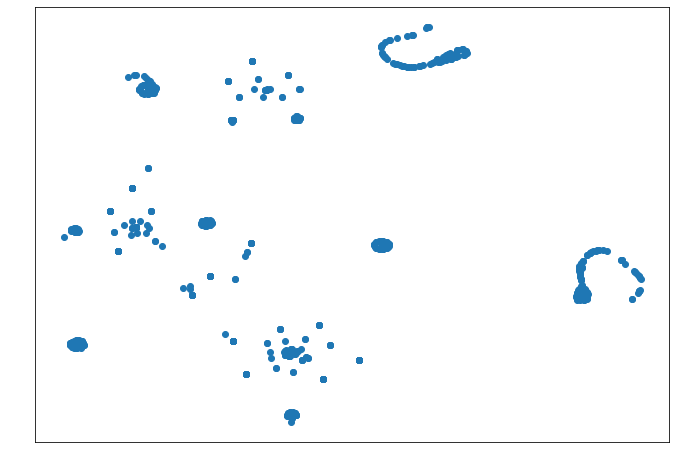

In [78]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(pca_transformed_data)

df_trading5['x'] = transformed_features[:,0]
df_trading5['y'] = transformed_features[:,1]

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(25)
ax = fig.add_subplot(121)
ax.tick_params(axis='x', colors='white')  #setting up X-axis tick color to white
ax.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to white

plt.scatter(df_trading5['x'], df_trading5['y'])
plt.show()

In [64]:
# Initialize PCA model
pca = PCA(n_components=2)

# Get two principal components for the iris data.
crypto_pca = pca.fit_transform(scaled_data)

In [66]:
# Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2"]
)
df_crypto_pca.head()

,principal component 1,principal component 2
0,0.818637,-0.679241
1,0.818633,-0.679242
2,0.756313,0.226039
3,-0.706987,0.247124
4,-0.701023,0.138647


In [68]:
from sklearn.cluster import KMeans

# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

C:\Users\srobi\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


    agg_filter = None
    alpha = None
    animated = False
    bbox_patch = None
    children = []
    clip_box = None
    clip_on = True
    clip_path = None
    color or c = black
    contains = None
    figure = Figure(1800x576)
    fontfamily or family = ['sans-serif']
    fontname or name = DejaVu Sans
    fontproperties or font or font_properties = sans\-serif:style=normal:variant=normal:weight=nor...
    fontsize or size = 12.0
    fontstyle or style = normal
    fontvariant or variant = normal
    fontweight or weight = normal
    gid = None
    horizontalalignment or ha = center
    in_layout = True
    label = 
    path_effects = []
    picker = None
    position = (0.5, 1.0)
    rasterized = None
    rotation = 0.0
    rotation_mode = None
    sketch_params = None
    snap = None
    stretch = normal
    text = Elbow Curve
    transform = CompositeGenericTransform(     BboxTransformTo(   ...
    transformed_clip_path_and_affine = (None, None)
    unitless_position = (0.5, 1

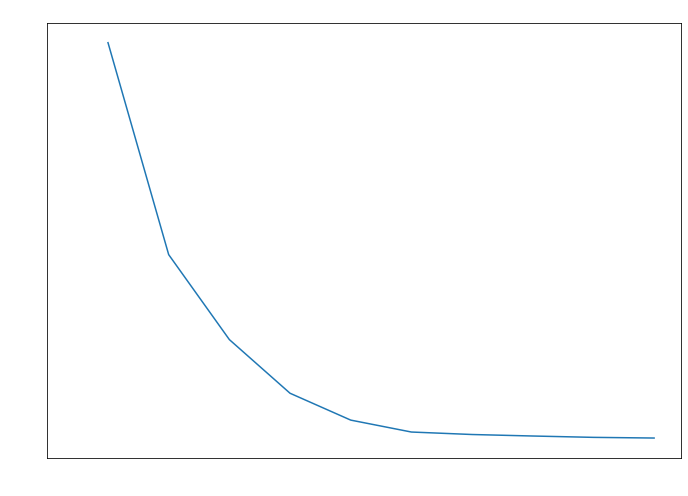

In [82]:
# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(25)
ax = fig.add_subplot(121)
ax.xaxis.label.set_color('white')        #setting up X-axis label color to white
ax.yaxis.label.set_color('white')          #setting up Y-axis label color to white
ax.tick_params(axis='x', colors='white')  #setting up X-axis tick color to white
ax.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to white

title_obj = plt.title('Elbow Curve') #get the title property handler
plt.getp(title_obj)                    #print out the properties of title
plt.getp(title_obj, 'text')            #print out the 'text' property for title
plt.setp(title_obj, color='white')         #set the color of title to red

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [70]:
a = pca.explained_variance_ratio_
round(sum(a), 2)

0.43